# Памятка
переменные, которые содержит датасет:

1. **school** — аббревиатура школы, в которой учится ученик

2. **sex** — пол ученика ('F' - женский, 'M' - мужской)

3. **age** — возраст ученика (от 15 до 22)

4. **address** — тип адреса ученика ('U' - городской, 'R' - за городом)

5. **famsize** — размер семьи('LE3' <= 3, 'GT3' >3)

6. **Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. **Medu** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. **Fedu** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. **Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. **Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. **reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. **guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. **traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. **studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. **failures** — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. **schoolsup** — дополнительная образовательная поддержка (yes или no)

17. **famsup** — семейная образовательная поддержка (yes или no)

18. **paid** — дополнительные платные занятия по математике (yes или no)

19. **activities** — дополнительные внеучебные занятия (yes или no)

20. **nursery** — посещал детский сад (yes или no)

21. **higher** — хочет получить высшее образование (yes или no)

22. **internet** — наличие интернета дома (yes или no)

23. **romantic** — в романтических отношениях (yes или no)

24. **famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. **freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. **goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. **health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. **absences** — количество пропущенных занятий

29. **score** — баллы по госэкзамену по математике

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

df = pd.read_csv('stud_math.csv')

In [2]:
display(df.head(10))
df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [61]:
# доп. функции

# функция замены NaN на None
def replase_nan(x):
    return np.nan if str(x).strip().lower() == 'nan' else x

# функция замены пустых строк на None
def replase_empty(x):
    return None if str(x).strip() == '' else x

# функция замены строковых значений yes/no на числовые аналоги 1/0 соответственно
def replase_yes_no(x):
    return int(str(x).strip().lower() == 'yes')

# функция построения boxplot-графиков для номинативных переменных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df,
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

Заменим все пустые строки, None на NaN
Для этого воспользуемся функциями replase_nan() и replase_empty(), описанными выше, а также встренной в pandas методом .fillna()

In [4]:
for column in df.columns:
    df[column] = df[column].apply(replase_nan)
    df[column] = df[column].apply(replase_empty)
df = df.fillna(value=np.nan)
df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
108,GP,M,15,R,GT3,NaN,4.0,4.0,other,other,home,father,4.0,4.0,NaN,no,yes,yes,yes,yes,-12.0,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
315,GP,F,19,R,GT3,T,2.0,3.0,other,other,reputation,other,1.0,3.0,1.0,no,no,no,no,yes,-9.0,yes,yes,yes,4.0,1.0,2.0,3.0,40.0,55.0
55,GP,F,16,U,GT3,A,2.0,1.0,other,other,other,mother,1.0,2.0,0.0,no,no,yes,yes,yes,-6.0,yes,yes,yes,5.0,3.0,4.0,NaN,8.0,50.0
381,MS,M,18,R,GT3,T,2.0,1.0,other,other,other,mother,2.0,1.0,0.0,no,no,no,yes,no,-3.0,yes,yes,yes,4.0,4.0,3.0,5.0,5.0,35.0
285,GP,M,17,U,GT3,T,1.0,1.0,other,other,reputation,father,1.0,2.0,0.0,no,no,yes,no,no,-6.0,yes,yes,no,4.0,3.0,3.0,4.0,2.0,55.0
331,GP,F,17,R,GT3,T,2.0,4.0,at_home,other,course,NaN,1.0,3.0,0.0,no,yes,no,no,yes,-9.0,NaN,yes,yes,4.0,4.0,3.0,5.0,7.0,70.0
317,GP,F,18,U,GT3,T,4.0,3.0,other,other,course,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,NaN,3.0,4.0,5.0,9.0,45.0
111,GP,F,16,R,GT3,T,3.0,3.0,services,other,reputation,father,1.0,3.0,1.0,yes,yes,no,yes,yes,-9.0,yes,yes,no,4.0,1.0,2.0,2.0,0.0,50.0
299,GP,M,18,U,LE3,T,4.0,4.0,teacher,teacher,home,mother,1.0,1.0,0.0,no,yes,yes,no,yes,-3.0,yes,yes,yes,1.0,4.0,2.0,1.0,5.0,80.0


# school — аббревиатура школы, в которой учится ученик

,school
GP,349
MS,46


<AxesSubplot:>

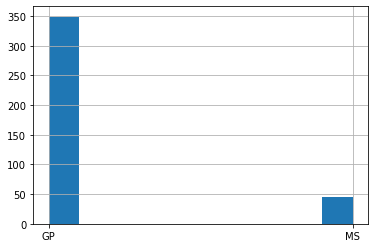

In [5]:
# посмотрим сколько школ учавствовало в опросе
display(pd.DataFrame(df.school.value_counts()))
df.school.hist()

Как видно, распределение не равномерное. Возможно даннный параметр понадобится для составления итоговой модели, оставим его.

# sex — пол ученика

,sex
F,208
M,187


<AxesSubplot:>

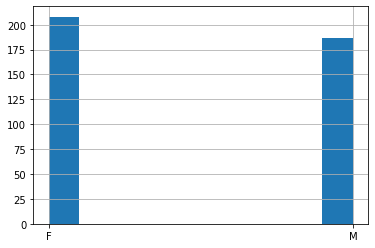

In [6]:
# Посмотрим сколько представителей каждого пола учавстсвовало в опросе
display(pd.DataFrame(df.sex.value_counts()))
df.sex.hist()

В датасете примерно равное соотношение полов детей. Данный параметр так же может пригодиться.

# age — возраст ученика

[18 17 15 16 19 22 20 21]


,age
16,104
17,98
15,82
18,82
19,24
20,3
21,1
22,1


<AxesSubplot:>

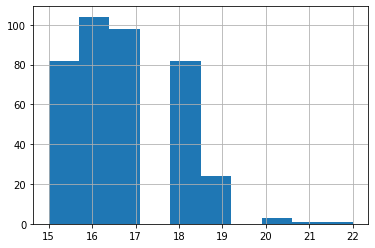

In [7]:
print(df.age.unique())
display(pd.DataFrame(df.age.value_counts()))
df.age.hist()

возраст 

# address — тип адреса ученика ('U' - городской, 'R' - за городом)

['U' nan 'R']


,address
U,295
R,83


<AxesSubplot:>

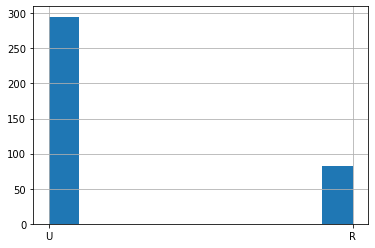

In [8]:
print(df.address.unique())
display(pd.DataFrame(df.address.value_counts()))
df.address.hist()

Здесь мы видим что представленных в датасете школах больше учеников, проживающих в городе.
Данный параметр косвенно отражает условия жизни учащихся, поэтому есть вероятность корреляции с итоговой оценкой по математике (score)

# famsize — размер семьи('LE3' <= 3, 'GT3' >3)

[nan 'GT3' 'LE3']


,famsize
GT3,261
LE3,107


<AxesSubplot:>

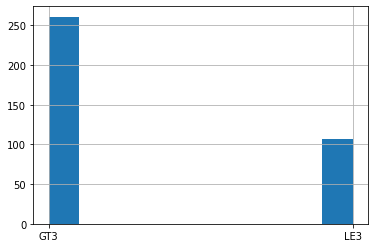

In [9]:
print(df.famsize.unique())
display(pd.DataFrame(df.famsize.value_counts()))
df.famsize.hist()

Как показывает практика психологов, полнота семьи имеет влияние на успеваемость учеников, однако по данным показателям трудно оценить семья из 3х и более человек полная, или же, к примеру, мать-одинчка воспитывает двух и более детей. Следовательно данная характеристика может иметь влияние на итоговую оценку по математике.

# Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

['A' nan 'T']


,Pstatus
T,314
A,36


<AxesSubplot:>

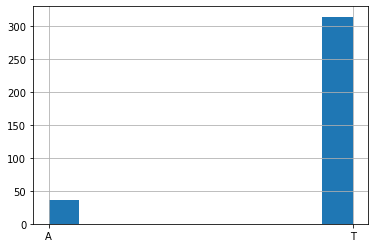

In [10]:
print(df.Pstatus.unique())
display(pd.DataFrame(df.Pstatus.value_counts()))
df.Pstatus.hist()

Данный параметр, вероятно, слабо влияет на параметр score.

# Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

[ 4.  1.  3.  2. nan  0.]


,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


<AxesSubplot:>

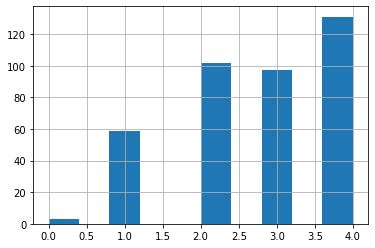

In [11]:
print(df.Medu.unique())
display(pd.DataFrame(df.Medu.value_counts()))
df.Medu.hist()

# Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

[ 4.  1.  2.  3. 40. nan  0.]


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<AxesSubplot:>

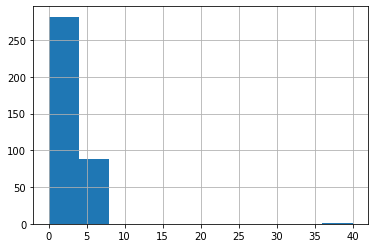

In [12]:
print(df.Fedu.unique())
display(pd.DataFrame(df.Fedu.value_counts()))
df.Fedu.hist()

По данным видно что в этом столбце присутсвуют показания, выходящие за границу допустимых значений. Исправим это:

array([ 4.,  1.,  2.,  3., nan,  0.])

<AxesSubplot:>

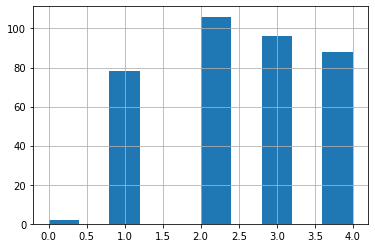

In [13]:
df.Fedu = df.Fedu[df.Fedu.between(0, 4)]
display(df.Fedu.unique())
df.Fedu.hist()

Образование родителей, зачастую, имеет положительное влияние на успеваимость ребёнка, следовательно, вероятно наличие положительной корреляции с параметром score.

# Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

['at_home' 'health' 'other' 'services' 'teacher' nan]


,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


<AxesSubplot:>

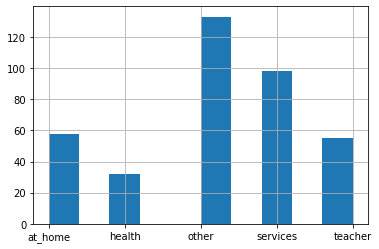

In [14]:
print(df.Mjob.unique())
display(pd.DataFrame(df.Mjob.value_counts()))
df.Mjob.hist()

# Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

['teacher' 'other' nan 'health' 'services' 'at_home']


,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


<AxesSubplot:>

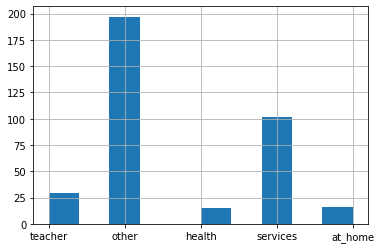

In [15]:
print(df.Fjob.unique())
display(pd.DataFrame(df.Fjob.value_counts()))
df.Fjob.hist()

Работа родителей может влиять на успеваимость ребёнка, но очень слабо.

# reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

['course' 'other' 'home' 'reputation' nan]


,reason
course,137
home,104
reputation,103
other,34


<AxesSubplot:>

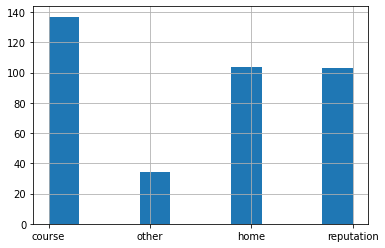

In [16]:
print(df.reason.unique())
display(pd.DataFrame(df.reason.value_counts()))
df.reason.hist()

Гипотетически, причина выбора школы, если и влияет на итоговую оценку, то очень слабо.

# guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

['mother' 'father' 'other' nan]


,guardian
mother,250
father,86
other,28


<AxesSubplot:>

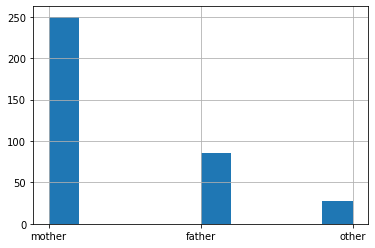

In [17]:
print(df.guardian.unique())
display(pd.DataFrame(df.guardian.value_counts()))
df.guardian.hist()

# traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

[ 2.  1.  3. nan  4.]


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


<AxesSubplot:>

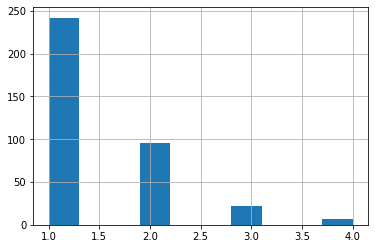

In [18]:
print(df.traveltime.unique())
display(pd.DataFrame(df.traveltime.value_counts()))
df.traveltime.hist()

# studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

[ 2.  3.  1. nan  4.]


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


<AxesSubplot:>

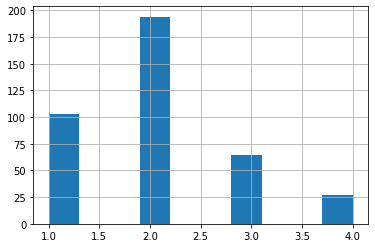

In [19]:
print(df.studytime.unique())
display(pd.DataFrame(df.studytime.value_counts()))
df.studytime.hist()

# failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

[ 0.  3. nan  2.  1.]


,failures
0.0,293
1.0,49
2.0,16
3.0,15


<AxesSubplot:>

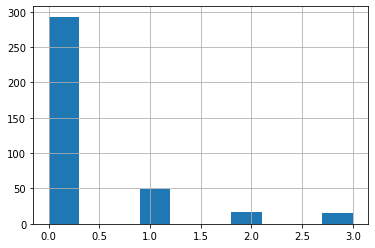

In [20]:
print(df.failures.unique())
display(pd.DataFrame(df.failures.value_counts()))
df.failures.hist()

# schoolsup — дополнительная образовательная поддержка (yes или no)

['yes' 'no' nan]


,schoolsup
no,335
yes,51


<AxesSubplot:>

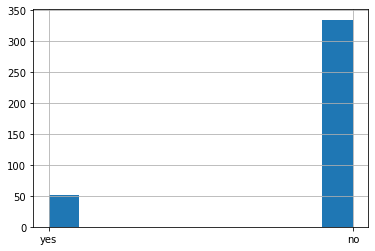

In [21]:
print(df.schoolsup.unique())
display(pd.DataFrame(df.schoolsup.value_counts()))
df.schoolsup.hist()

# famsup — семейная образовательная поддержка (yes или no)

['no' 'yes' nan]


,famsup
yes,219
no,137


<AxesSubplot:>

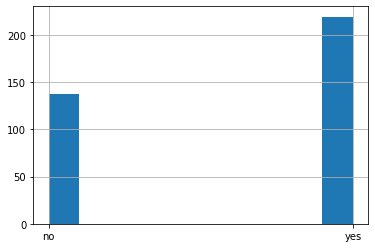

In [22]:
print(df.famsup.unique())
display(pd.DataFrame(df.famsup.value_counts()))
df.famsup.hist()

Дополнительная поддержка в образовании в школе и дома должны сильно влиять на итоговую оценку.

# paid — дополнительные платные занятия по математике (yes или no)

['no' nan 'yes']


,paid
no,200
yes,155


<AxesSubplot:>

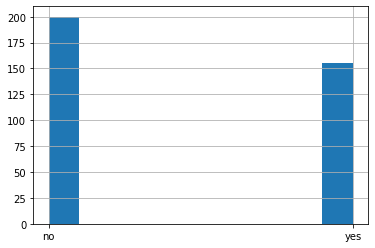

In [23]:
print(df.paid.unique())
display(pd.DataFrame(df.paid.value_counts()))
df.paid.hist()

Данный параметр, гипотетически, имеет прямое влияние на показатель параметра score

# activities — дополнительные внеучебные занятия (yes или no)

['no' 'yes' nan]


,activities
yes,195
no,186


<AxesSubplot:>

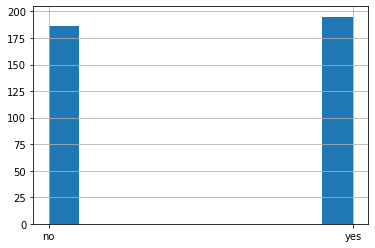

In [24]:
print(df.activities.unique())
display(pd.DataFrame(df.activities.value_counts()))
df.activities.hist()

Аналогично предыдущему параметру (paid), корреляция с пораметром score должна быть весомой.

# nursery — посещал детский сад (yes или no)

['yes' 'no' nan]


,nursery
yes,300
no,79


<AxesSubplot:>

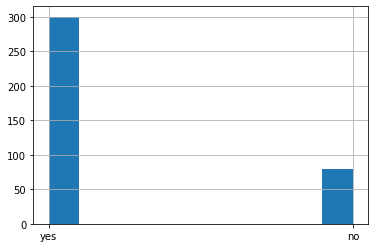

In [25]:
print(df.nursery.unique())
display(pd.DataFrame(df.nursery.value_counts()))
df.nursery.hist()

Посещение детского сада должно повлиять на качество обучения в школе, следовательно между данным параметром и score может быть положительная корреляция.

# higher — хочет получить высшее образование (yes или no)

['yes' nan 'no']


,higher
yes,356
no,19


<AxesSubplot:>

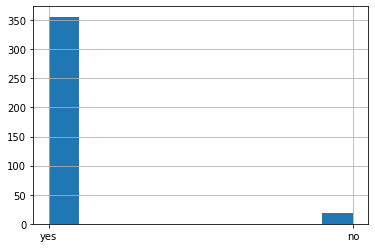

In [26]:
print(df.higher.unique())
display(pd.DataFrame(df.higher.value_counts()))
df.higher.hist()

Желание получить высшее образование может положительно влиять на результативность ученика, следовательно может быть положительная корреляция с параметром score.

# internet — наличие интернета дома (yes или no)

[nan 'yes' 'no']


,internet
yes,305
no,56


<AxesSubplot:>

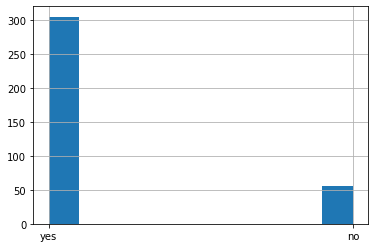

In [27]:
print(df.internet.unique())
display(pd.DataFrame(df.internet.value_counts()))
df.internet.hist()

Наличие интернета может коррелировать с итоговой оценкой по математике, но нельзя точно сказать положительной будет корреляция или отрицательной.

# romantic — в романтических отношениях (yes или no)

['no' nan 'yes']


,romantic
no,240
yes,124


<AxesSubplot:>

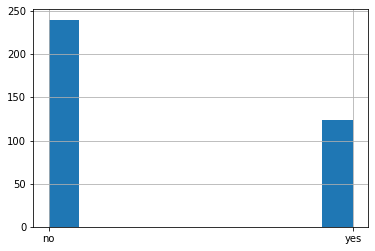

In [28]:
print(df.romantic.unique())
display(pd.DataFrame(df.romantic.value_counts()))
df.romantic.hist()

Гипотетически, романтические отношения могут влиять на итоговую оценку.

# famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

[ 4.  5.  3. nan -1.  2.  1.]


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


<AxesSubplot:>

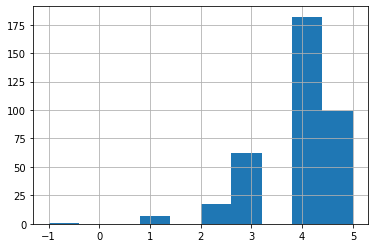

In [29]:
print(df.famrel.unique())
display(pd.DataFrame(df.famrel.value_counts()))
df.famrel.hist()

В данных присутствую значения, выходящие за грацину допустимых значений.

[ 4.  5.  3. nan  2.  1.]


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7


<AxesSubplot:>

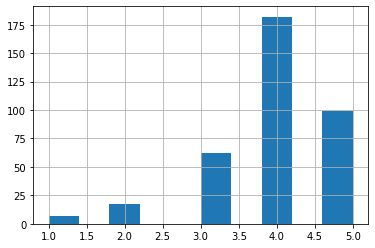

In [30]:
df.famrel = df.famrel[df.famrel.between(1, 5)]
print(df.famrel.unique())
display(pd.DataFrame(df.famrel.value_counts()))
df.famrel.hist()

# freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

[ 3.  2.  4.  1.  5. nan]


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


<AxesSubplot:>

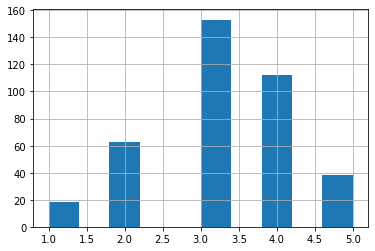

In [31]:
print(df.freetime.unique())
display(pd.DataFrame(df.freetime.value_counts()))
df.freetime.hist()

# goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

[ 4.  3.  2.  1.  5. nan]


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


<AxesSubplot:>

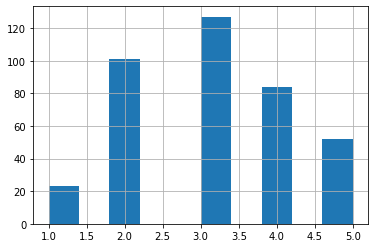

In [32]:
print(df.goout.unique())
display(pd.DataFrame(df.goout.value_counts()))
df.goout.hist()

# health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

[ 3.  5.  1.  2.  4. nan]


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


<AxesSubplot:>

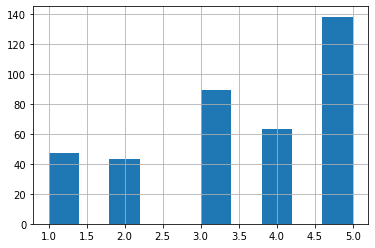

In [33]:
print(df.health.unique())
display(pd.DataFrame(df.health.value_counts()))
df.health.hist()

# absences — количество пропущенных занятий

[  6.   4.  10.   2.   0.  16.  nan  14.   7.   8.  25.  12.  54.  18.
  26.  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.
  30.  19.   9.  11.  38.  40.  23.  17. 212.]


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
14.0,12
12.0,12
3.0,8
16.0,7


<AxesSubplot:>

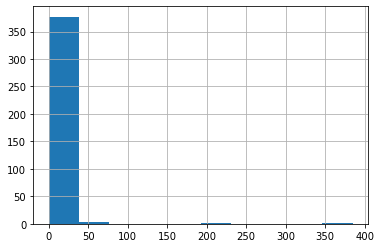

In [34]:
print(df.absences.unique())
display(pd.DataFrame(df.absences.value_counts()))
df.absences.hist()

Очевидно в данных присутствуют выбросы. Исправим это:

[ 6.  4. 10.  2.  0. 16. nan 14.  7.  8. 12. 18. 20.  5. 13. 15.  3.  1.
 19.  9. 11. 17.]


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<AxesSubplot:>

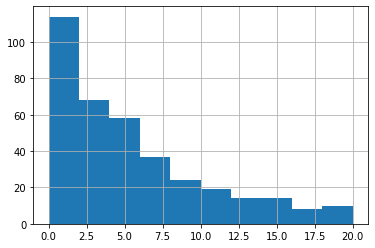

In [35]:
Q1 = df.absences.quantile(0.25)
Q3 = df.absences.quantile(0.75)
IQR = Q3 - Q1
df.absences = df.absences[df.absences.between(Q1 - 1.5*IQR, Q3 + 1.5*IQR)]

print(df.absences.unique())
display(pd.DataFrame(df.absences.value_counts()))
df.absences.hist()

Заменим пустые значения медианной величиной в столбцах absenses и score.  
Для заполнения выбрано медианное значение, исходя из того, что значения в этих столбцах не могут быть дробными.

,absences
0.0,111
4.0,82
2.0,60
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<AxesSubplot:>

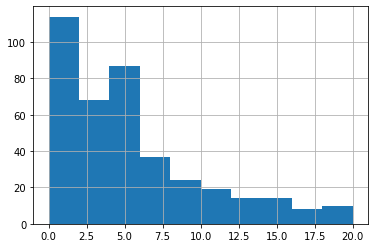

In [57]:
absenses_median = df.absences.median()
df.absences = df.absences.apply(lambda x: absenses_median if pd.isnull(x) else x)
display(pd.DataFrame(df.absences.value_counts()))
df.absences.hist()

# score — баллы по госэкзамену по математике

[ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.  nan  20.]


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
60.0,31
40.0,31
45.0,27
70.0,27
80.0,16


<AxesSubplot:>

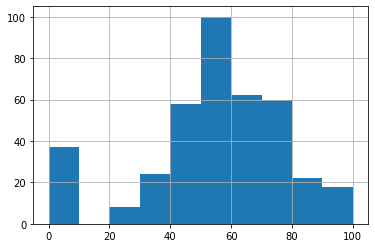

In [55]:
print(df.score.unique())
display(pd.DataFrame(df.score.value_counts()))
df.score.hist()


,score
50.0,54
55.0,52
0.0,37
75.0,33
65.0,31
60.0,31
40.0,31
45.0,27
70.0,27
80.0,16


<AxesSubplot:>

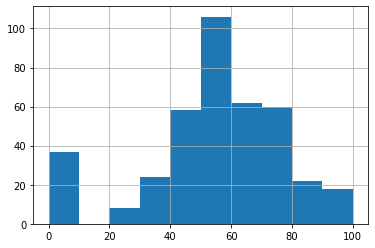

In [58]:
score_median = df.score.median()
df.score = df.score.apply(lambda x: score_median if pd.isnull(x) else x)
display(pd.DataFrame(df.score.value_counts()))
df.score.hist()

## Промежуточные выводы.
В ходе первичного осмотра данных выявлено что данные достаточно чистые, выдвинуты некоторые гипотезы.  
В столбцах absenses и score пропуски были заменены на медианные значения.  

Проведём корреляционный анализ и анализ номинативных переменных.

# Корреляционный анализ

## Памятка для удобства
1. **school** — аббревиатура школы, в которой учится ученик

2. **sex** — пол ученика ('F' - женский, 'M' - мужской)

3. **age** — возраст ученика (от 15 до 22)

4. **address** — тип адреса ученика ('U' - городской, 'R' - за городом)

5. **famsize** — размер семьи('LE3' <= 3, 'GT3' >3)

6. **Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. **Medu** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. **Fedu** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. **Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. **Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. **reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. **guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. **traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. **studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. **failures** — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. **schoolsup** — дополнительная образовательная поддержка (yes или no)

17. **famsup** — семейная образовательная поддержка (yes или no)

18. **paid** — дополнительные платные занятия по математике (yes или no)

19. **activities** — дополнительные внеучебные занятия (yes или no)

20. **nursery** — посещал детский сад (yes или no)

21. **higher** — хочет получить высшее образование (yes или no)

22. **internet** — наличие интернета дома (yes или no)

23. **romantic** — в романтических отношениях (yes или no)

24. **famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. **freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. **goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. **health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. **absences** — количество пропущенных занятий

29. **score** — баллы по госэкзамену по математике

In [40]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.159546,0.081508,-0.015556,0.228047,0.015556,0.063539,0.029023,0.135107,-0.065946,0.151493,-0.155726
Medu,-0.161704,1.000000,0.629956,-0.173515,0.078589,-0.245463,-0.078589,-0.020896,0.025335,0.064164,-0.045051,0.065712,0.213349
Fedu,-0.159546,0.629956,1.000000,-0.155459,0.008603,-0.271936,-0.008603,-0.035788,-0.021415,0.046581,0.022588,-0.021415,0.130002
traveltime,0.081508,-0.173515,-0.155459,1.000000,-0.102206,0.064699,0.102206,-0.028220,-0.021937,0.037636,-0.021531,-0.047995,-0.070559
studytime,-0.015556,0.078589,0.008603,-0.102206,1.000000,-0.178992,-1.000000,0.028918,-0.121969,-0.051280,-0.080016,-0.078099,0.115741
failures,0.228047,-0.245463,-0.271936,0.064699,-0.178992,1.000000,0.178992,0.011942,0.098382,0.120914,0.081284,0.081801,-0.344338
"studytime, granular",0.015556,-0.078589,-0.008603,0.102206,-1.000000,0.178992,1.000000,-0.028918,0.121969,0.051280,0.080016,0.078099,-0.115741
famrel,0.063539,-0.020896,-0.035788,-0.028220,0.028918,0.011942,-0.028918,1.000000,0.164324,0.069241,0.097910,-0.073509,0.051219
freetime,0.029023,0.025335,-0.021415,-0.021937,-0.121969,0.098382,0.121969,0.164324,1.000000,0.296437,0.061575,0.093436,0.019026
goout,0.135107,0.064164,0.046581,0.037636,-0.051280,0.120914,0.051280,0.069241,0.296437,1.000000,-0.015608,0.111587,-0.129685


Из таблицы коэффициентов корреляции видно что:
- существует небольшая тенденция ухудшения оценок учеников с возрастом (Age). Это может свидетельствовать о снижении интереса учащихся к обучению.
- образование родителей (Medu, Fedu), как и предполагалось, положительно влияет на успеваемость их детей.
- время в пути до школы (traveltime) очень слабо негативно влияет на итоговую оценку, следовательно этим параметром можно пренебречь.
- выделенное время на учёбу вне школы (studytime) положительно влияет на итоговую оценку, хоть и слабее чем образование родителей. Данный столбец следует оставить.
- количество внеучебных неудач (failures) негативно влияет на итоговую оценку, и влияние это довольно велико. Этот столбец остаётся в итоговом датасете.
- столбец studytime, granular - полная противоположность столбца studytime, следовательно этим столбцом можно пренебречь.
- семейные отношения (famrel) и свободное после школы время (freetime) имеют очень слабое влияние на итоговую оценку, их можно не учитывать.
- с увеличением времени проведения с друзьями (goout) ухудшается итоговый балл за госэкзамен. Данный столбец остаётся в итоговом датасете.
- текущее стостояние здоровья ученика (health) и количество пропущеных занятий практически (absences) не влияю на итоговый балл. Данными параметрами можно пренебреч.

# Анализ номинативных переменных

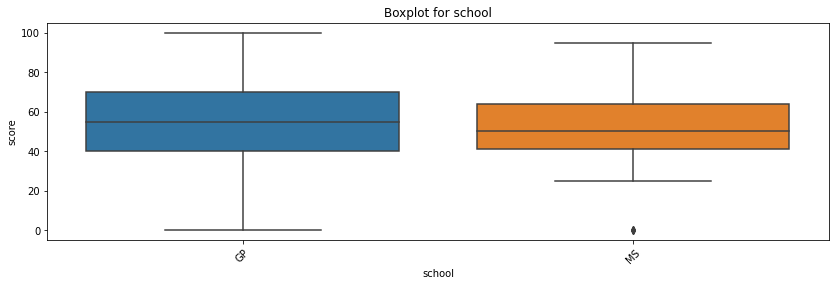

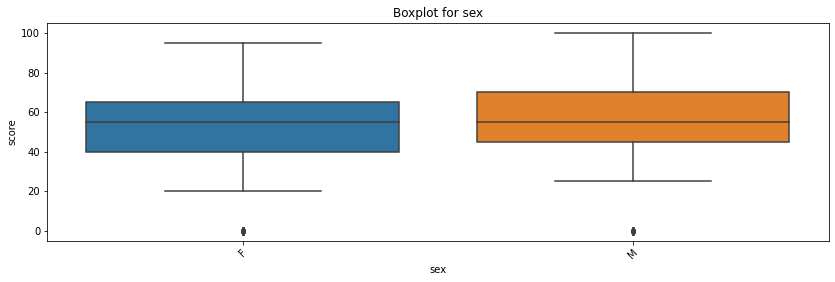

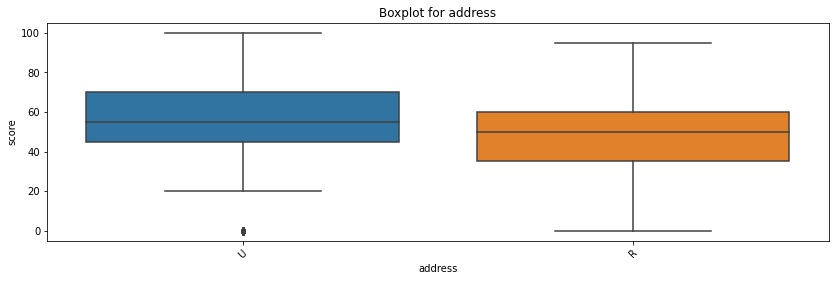

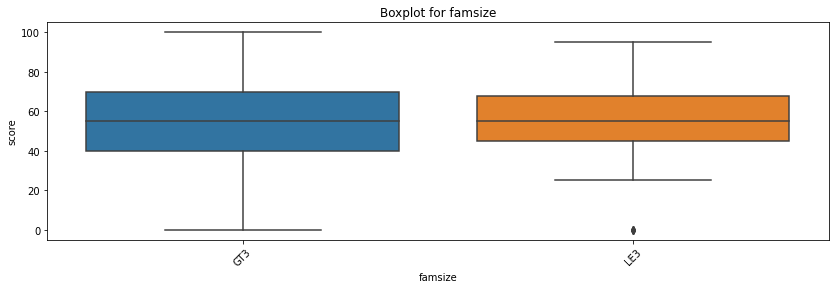

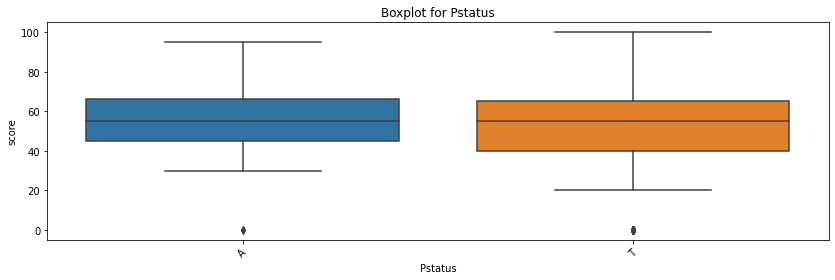

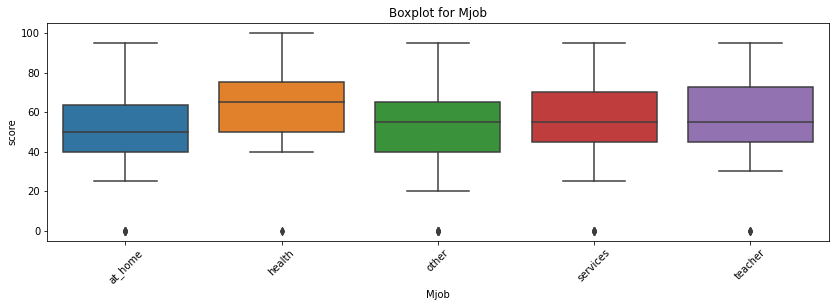

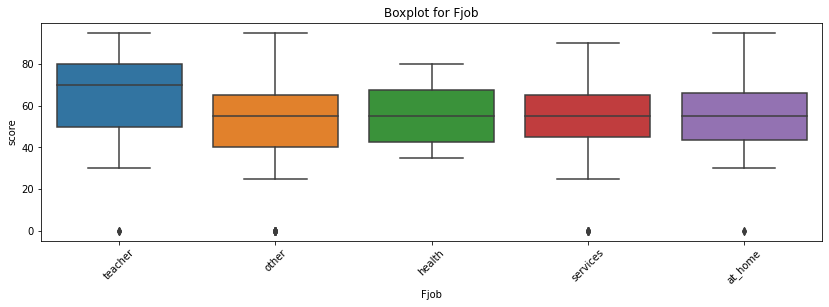

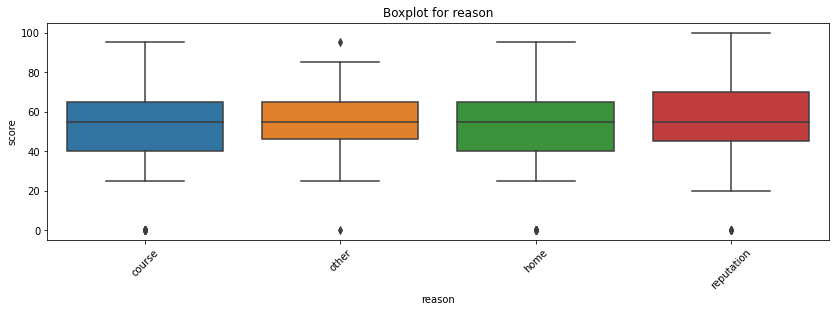

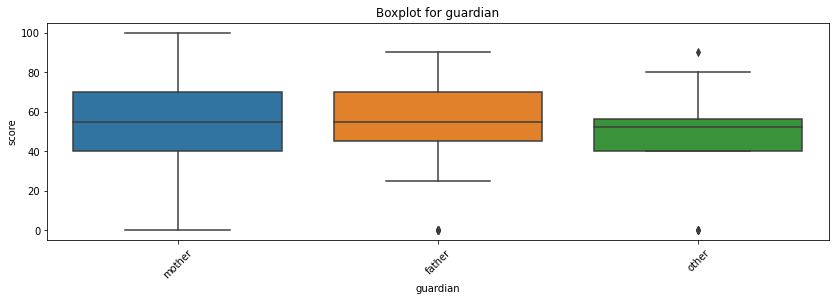

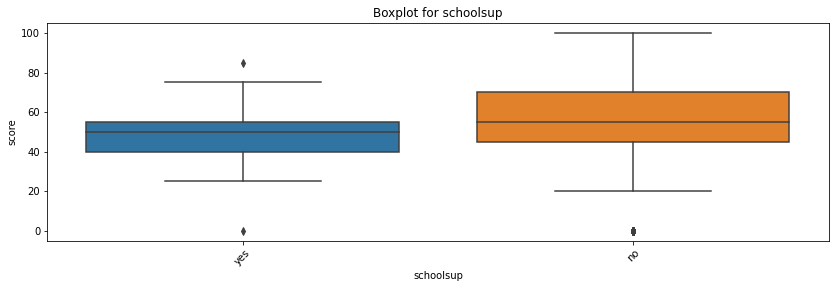

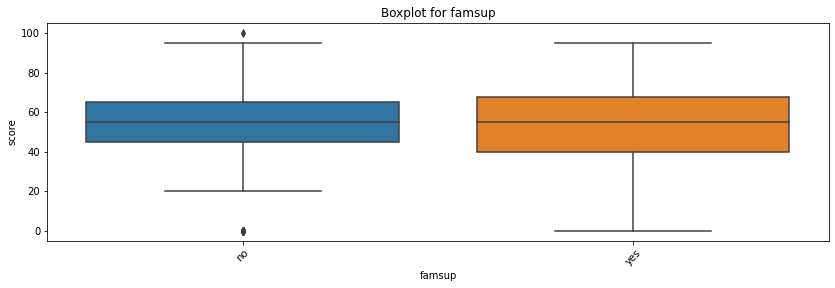

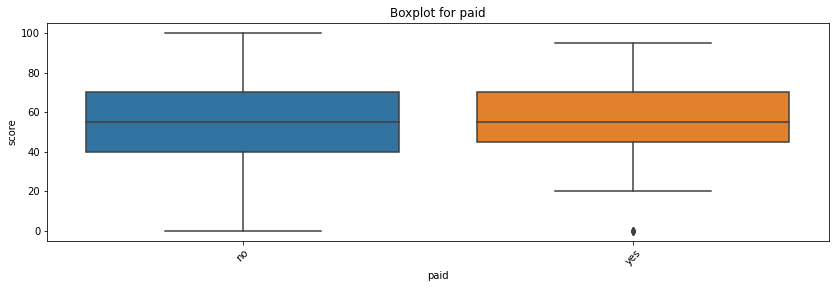

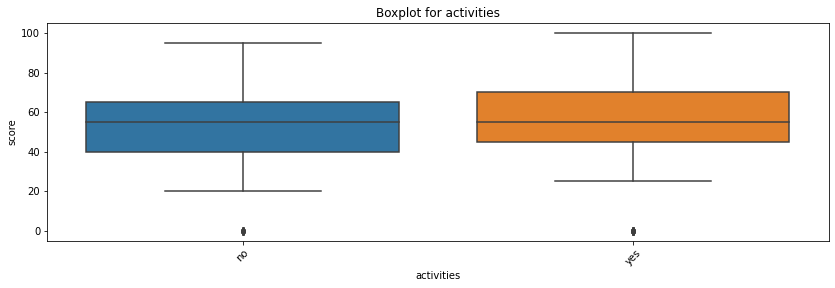

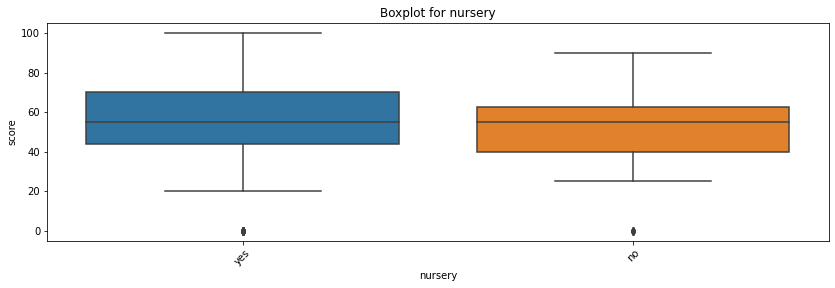

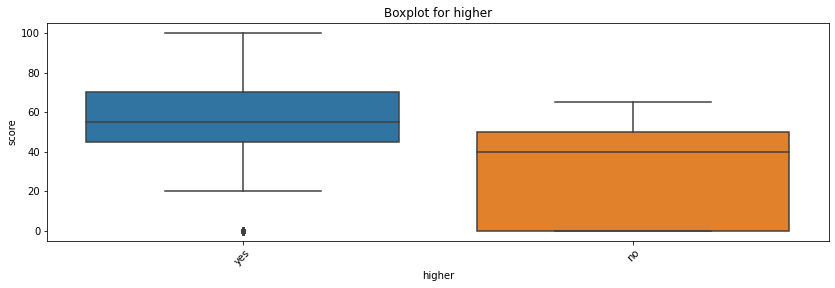

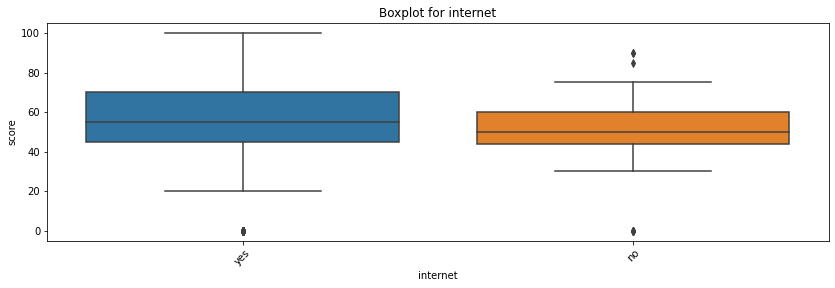

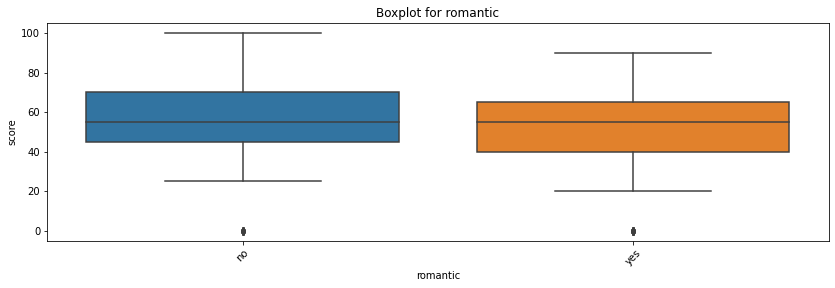

In [62]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
            'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 
            'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Судя по графикам пол (sex), размер семьи (famsize), статус совместного жилья родителей (Pstatus), причина выбора школы (reason), кто является опекуном (guardian), семейная образовательная поддержка (famsup), дополнительные платные занятия по математике (paid), дополнительные внеучебные занятия (activities), посещал детский сад (nursery), нахождение в романтических отношениях (romantic) не влияют на параметр score.  
Прежде чем делать окончательное решение по игнорированию столбцов проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения баллов за госэкзамен по различным параметрам неразличимы:

In [64]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
            'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 
            'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Серьёзные отличия имеют 4 параметра: address, Mjob, higher, romantic.Оставим эти переменные в датасете для дальнейшего построения модели. 
Итак, в нашем случае важные переменные, которые, вероятно, оказывают влияние на оценку, это:
- address
- Mjob
- higher
- romantic
- age
- Medu
- Fedu
- studytime
- failures
- goout

In [66]:
df_for_model = df.loc[:, ['address', 'Mjob', 'higher', 'romantic', 'age', 
                          'Medu', 'Fedu', 'studytime', 'failures', 'goout']]
df_for_model.head()

,address,Mjob,higher,romantic,age,Medu,Fedu,studytime,failures,goout
0,U,at_home,yes,no,18,4.0,4.0,2.0,0.0,4.0
1,U,at_home,yes,no,17,1.0,1.0,2.0,0.0,3.0
2,U,at_home,yes,NaN,15,1.0,1.0,2.0,3.0,2.0
3,U,health,yes,yes,15,4.0,2.0,3.0,0.0,2.0
4,U,other,yes,no,16,3.0,3.0,2.0,0.0,2.0


# Выводы
Итак, в результате разведывательного анализа данных было выяснено:
- данные, представленные в датасете достаточно чистые;
- выбросы найдены только в столбце absences;
- отрицательная корреляция столбцов age и score может свидетельствовать о снижении интереса к обучению с взрослением учащихся.
- В столбцах absenses и score пропуски были заменены на медианные значения
- Самые важные параметры, которые предполагается использовать в дальнейшем для построения модели: address, Mjob, higher, romantic, age, Medu, Fedu, studytime, failures, goout.
- Большинство гипотез, выдвинутых в ходе рассмотрения каждого отдельного параметра подтердились корреляционным анализом и анализом номинативных переменных.